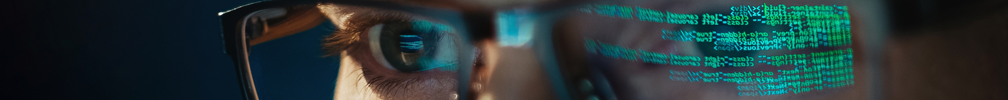
# Week 10 Overview
Suppose your client sees a sudden increase in sales and wants to know if it’s due to a recent advertising campaign or simply a seasonal trend. In machine learning, we are often focused on finding patterns and making predictions, but understanding why things happen requires a different approach: causal inference. How can we tell if one event directly influences another? And what tools do we have to go beyond correlation and actually determine causation?

Last week, we explored variable importance methods, focusing on identifying which features have the greatest influence on model predictions. We discussed techniques that help us interpret and understand model behavior by ranking features based on their impact, which allowed us to make more informed decisions about model design and feature selection. Building on this, this week we shift our focus to causal inference, moving beyond feature importance to ask a deeper question: does a particular feature actually cause an outcome? In this lesson, we’ll examine the distinction between correlation and causation and understand the pivotal role of randomized controlled trials. By the end of the week, you'll gain tools to judge the causal impact of variables, knowing when and when not to assert causal inference. 

### Key Terms
- **Causation:** A relationship where one event (the cause) directly affects another event (the effect)
- **Correlation:** A statistical association between two variables, where changes in one variable are related to changes in another, without necessarily implying causation
- **Confounding Variable:** An external factor that influences both the independent variable and the dependent variable, potentially distorting the perceived relationship between them. This can lead to incorrect conclusions about causation or association in a model.
- **Randomized Controlled Trial (RCT):** An experimental method that randomly assigns subjects to different groups to measure the effect of an intervention

## 10.1 Lesson: Correlation $\neq$ Causation: Why We Need Causal Inference
Consider the following chart showing the relationship in various countries between chocolate consumption and the percentage of the population that received Nobel Prizes:

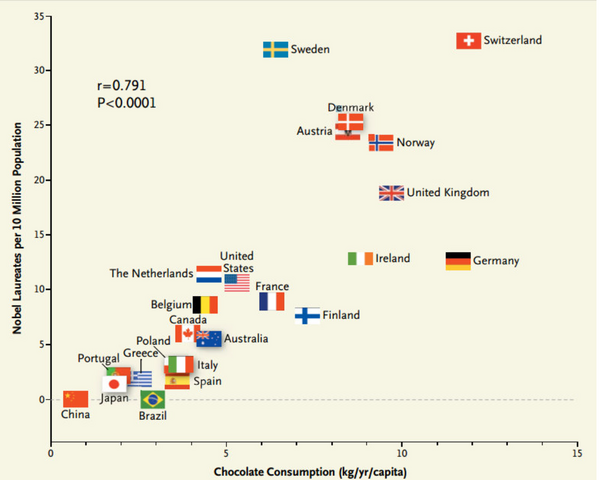

The **P-Value** in the chart (P<0.0001), represents the probability that the observed relationship between chocolate consumption and Nobel Laureates occurred purely by chance. In statistical terms, smaller P-values indicate stonger evidence against the idea that the relationship is due to random variation. 

- A P-value of **0.1** means there's a 10% chance the relationship happened by chance. A P-Value of **0.01** means there's a 1% chance. 
- Conventionally, P < 0.05 is considered significantly significant, implying its unlikely the relationship is coincidental.

With P < 0.0001, this chart suggests there's less than a **0.01** chance the correlation is random, implying a strong statisical link between chocolate consumption and Nobel Prizes, leading to the seemingly plausible conclusion that increased chocolate consumption may somehow boost Nobel prize outcomes.

However, this example shows that **correlation does not imply causation**. There are several possibilities when two factors A and B are correlated:
1. **A causes B:** Chocolate consumption enhances cognitive function, increasing the likelihood of producing Nobel-level research
2. **B causes A:** Winning Nobel Prizes could lead to celebrations and greater chocolate consumption in those countries
3. **C causes both A and B:** A third factor, such as **wealth**, might drive both higher chocolate consumption and greater academic achievements. Wealthier countries tend to consume more luxury products, like chocolate, and also invest more in education and research, leading to a higher likelihood of producing Nobel laureates.

Clearly (3) is the most likely explanation!

In this example, **wealth** acts as a **confounder** (or **confounding variable**). A confounder is an external factor that influences both the independent variable (the assumed cause) and the dependent variable (the observed effect), creating a misleading impression of a direct relationship between them. In the case of chocolate consumption and Nobel Prizes, wealth affects both—wealthier countries are more likely to consume luxury goods like chocolate and invest in education and research, leading to more Nobel laureates.

This highlights a critical pitfall in data analysis: **mistaking correlation for causation**. While machine learning excels at identifying patterns and relationships, it cannot explain *why* those patterns exist. To uncover the underlying causes, we need causal inference. Without this distinction, we risk drawing flawed conclusions, potentially leading to ineffective or even harmful decisions in areas like healthcare, policy, and business strategy. Rigorous causal analysis is essential to avoid these errors and make informed, evidence-based decisions.

### Think About It
- Suppose you have a dataset that shows a strong correlation between consumption of ice cream at Australian beaches and shark attacks. Do you think it likely that eating ice cream causes shark attacks (or the reverse)? What confounding variable might be at play here?
- Data in certain towns has shown a correlation between the number of churches and the crime rate—towns with more churches tend to have higher crime rates. Do churches somehow cause crime? Or does crime somehow encourage the building of more churches? Or could town size be a confounder?

## 10.2 Lesson: Introduction to Causal Inference
Causal inference is the process of estimating the effect of a treatment or intervention on an outcome. This concept is essential when trying to establish whether one factor actually causes a change in another, rather than just being associated with it. Examples of causal questions include:

- The impact of soda taxes on soda consumption
- The effect of social media use on mental health
- In marketing, the effect of different ad types (Ad A vs. Ad B) on conversion rates

We’ll use a marketing example throughout this lesson to demonstrate causal inference, with a focus on choosing the best ad for conversions.

### Example Scenario: Choosing Between Ads
In marketing, a conversion refers to a desired action taken by a user in response to a marketing effort. It typically marks the point where a user transitions from a potential lead to achieving a specific business goal.

Retargeting in advertising refers to the practice of serving ads to people who have previously interacted with your brand, such as visiting your website, viewing a product, or adding items to their cart without completing a purchase. (Retargeting typically works through tracking technologies like cookies.) The goal is to re-engage these users and encourage them to return and take a specific action, like completing a purchase or signing up for a service.

Suppose a marketing agency working for Toyota wants to select either Ad A or Ad B to maximize conversions.

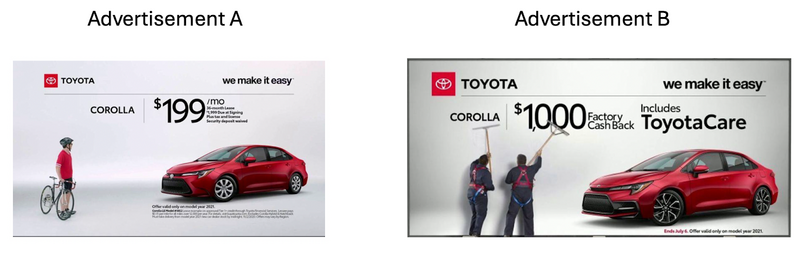

Here’s how we define the components of this problem:
- Treatment (T): The ad type (Ad A or B)
- Outcome (Y): Conversion (1 if a user fills out a form to contact a dealer; 0 otherwise)
- Confounder (C): Retargeting indicator (1 if the ad was shown after visiting a car-related website; 0 otherwise)

The agency has access to this historical performance data:

**Table 1:** *Converson Rates by Ad and Retargeting Strategy*
| | **Non-retargeted (C=0)** | **Retargeted (C=0)** | **Total** |
| :--- | :--- | :--- | :--- |
| **Ad A** | 13.3% (120/900) | 30% (30/100) | 15% (150/1000) |
| **Ad B** | 10% (10/100) | 22.5% (90/400) | 20% (100/500) |

What does the data tell us about which advertisement produces more conversions?

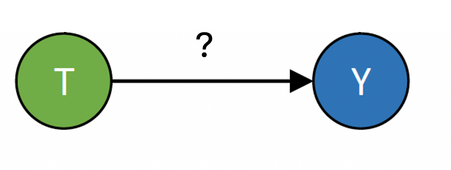

There are at least two scenarios to consider.

### Case 1: Retargeting is a Confounder
It is possible that retargeted consumers are:
- More likely to be shown Ad B, and
- More likely to convert

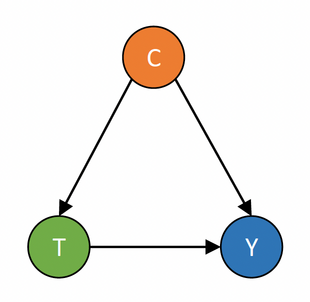

In this scenario, evaluating the total conversions across all consumers can be misleading because it overlooks the influence of retargeting on ad exposure.

In other words, Ad B may appear to perform better, but this is actually due to its higher exposure to retargeted consumers, who are already more likely to convert.

**Solution:** we need to compare their performance **within each targeting group**

**Table 2:** *Conversion Rates by Ad and Retargeting Strategy (Non-Retargeted vs. Retargeted)*
| | **Non-retargeted (C=0)** | **Retargeted (C=1)** | **Total** |
| :--- | :--- | :--- | :--- |
| **Ad A** | 13.3% (120/900) | 30% (30/100) | 15% (150/1000) |
| **Ad B** | 10% (10/100) | 22.5% (90/400) | 20% (100/500) |

Clearly, **Ad A is the better choice** because it outperforms Ad B for both retargeted and non-retargeted consumers.

### Case 2: When Treatment Influences Confounding Variables
Suppose consumers who are shown Ad B are more likely to be retargeted due to the ad’s design or strategy (e.g., Ad B focuses on offering deals, which might trigger follow-up retargeting efforts). This means that Ad B’s conversions within the retargeted group will likely be higher, but this boost is partially driven by the retargeting strategy, not just the ad’s effectiveness.

If you were to evaluate the ads by comparing retargeted and non-retargeted groups separately, you’d ignore the fact that Ad B is disproportionately benefiting from the retargeting process, which it actually helped to initiate.

In this case, T (the choice of advertisement) affects C (whether a consumer is retargeted), so C becomes an intermediate outcome of T:

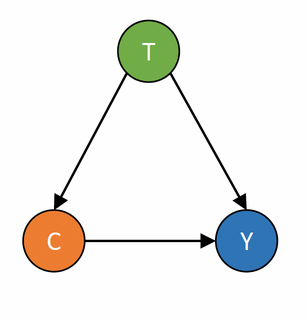

In this case, we cannot look at retargeting groups separately because the ad choice influences which group consumers fall into.

**Solution:** Examine the overall effect without dividing by retargeting status. If Ad B has a higher total conversion rate, then **Ad B is the better choice**.

### Conclusion
Which ad produces more conversions, given our dataset? **We really don’t know!**

This example highlights the inherent challenges of uncovering causal relationships when confounding variables are at play. In real-world scenarios like marketing, relying solely on observational data often leads to incomplete or misleading conclusions. While machine learning and data analysis are powerful tools for identifying patterns, they fall short of answering the fundamental question businesses care about most: **what truly drives customer behavior?** The reality is that datasets often lack the necessary information to fully capture causality, underscoring the limitations of data-driven insights without rigorous causal analysis.

To overcome this, we consider **randomized trials**—the “gold standard” for establishing causation in the presence of confounding variables.

**Think About It**
Can you think of other real-world scenarios where confounding variables might distort the perceived relationship between two factors?
How might a company make a flawed decision if it only relies on observed correlations, such as Ad B appearing to drive more conversions?
Why can’t we simply compare conversion rates within retargeted and non-retargeted groups to determine the better ad? What biases might arise from this approach, particularly if the treatment (ad choice) influences whether a user is retargeted?
Can you think of situations where it is not possible to determine all possible confounders?


## 10.3 Lesson: Randomized Controlled Trials
A **Randomized Controlled Trial (RCT)** is an experimental study design used to evaluate the causal impact of a treatment or intervention. Participants are randomly assigned to either a treatment group that receives the intervention or a control group that does not. Randomization helps ensure that any differences between the groups are due to the treatment itself and not confounding variables, providing a reliable way to infer causation. RCTs are widely used in fields like healthcare, social sciences, and marketing to measure the effectiveness of interventions.

### Applying RCTs to our Example
In our earlier scenario, where we decided between **Ad A** and **Ad B**, retargeting acted as a confounder, influencing which ad was shown and skewing the results. To accurately determine which ad drives higher conversions, we could conduct an **RCT**.

Here's how it works:

#### Random Assignment:
Customers would be randomly assigned to view either Ad A or Ad B, regardless of whether they are eligible for retargeting
#### Breaking The Correlation:
This randomization eliminates the correlation between **ad choice** and **retargeting**, ensuring a fair comparison between Ad A and Ad B

This setup allows us to measure the true causal effect of each ad on conversion rate, free from the influence of confounders like retargeting.

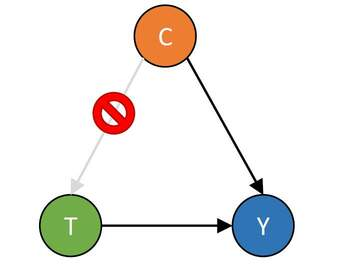

Here’s an example of data that could result from running an RCT for Ad A vs. Ad B:

**Table 1:** *Ad A vs Ad B Randomized Control Trial*
| Random Group | Ad Type (T) | Retargeted (C) | Conversions (Y) |
| :--- | :--- | :--- | :--- |
| 1 | A | 0 | 15.6% (75/482) |
| 2 | A | 1 | 19.8% (101/509) |
| 3 | B | 0 | 22.6% (117/519) |
| 4 | B | 1 | 21.8% (107/491) |

Those shown Ad A converted at the rate of 176/991 = 17.8%

Those shown Ad B converted at the rate of 224/1009 = 22.2%

The RCT shows that Ad B is more effective in driving customer conversions.

### Be Skeptical! 
Always be skeptical of causal statements–especially in the context of machine learning. Statements like these should raise alarms:
- *“Switching to renewable energy reduced our operational costs.”*
    - Did energy prices for non-renewable sources increase during the same time period?
    - Could external factors explain this change?
- *“Customers who use our loyalty program spend 50% more than those who don’t.”*
    - Who is more likely to join the loyalty program?
    - Are these already your most loyal customers?
- *“Users who receive personalized recommendations spend more on average.”*
    - Are those users already more engaged or likely to spend?
    - Were they specifically targeted for recommendations?
- *“Companies that invest in employee training see higher profits.”*
    - Are more profitable companies simply more likely to afford employee training?
    - Which came first?

### Conclusions and Takeaways
Causal inference is the process of determining whether one factor (the **cause**) directly influences another (the **effect**), allowing us to move beyond simply identifying correlations.

Through techniques like **Randomized Controlled Trials**, causal inference enables us to isolate the true impact of a treatment or intervention. In our example, an RCT would allow us to determine whether Ad B genuinely drives higher conversions by eliminating the influence of confounders, such as retargeting bias. This ensures that we base decisions on cause-and-effect relationships rather than coincidental patterns in the data.

### Think About It
For each of the following statements, consider what confounders might raise flags in your analysis and what an RCT would look like.
- “Advertisers on this platform receive twice as many clicks as non-advertisers.”
- “After buying ads, sellers on this platform tripled their sales.”
- “Our app update reduced user churn by 20%.”
- “Students who attend more tutoring sessions have higher grades.”
- “Introducing free shipping increased our order volume by 30%.”
